<a href="https://colab.research.google.com/github/snsn3/genAI_regional_study/blob/main/FR_topics_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Topic modelling for French -

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [ ]:
# En FR: manuellement extraire les mots-stop (stop-words) - création d'un dict
manual_french_stop_words = [
    'le', 'la', 'les', 'un', 'une', 'des', 'ce', 'cet', 'cette',
    'ces', 'mon', 'ton', 'son', 'ma', 'ta', 'sa', 'notre', 'votre',
    'leur', 'nos', 'vos', 'leurs', 'du', 'de', 'au', 'aux', 'je',
    'tu', 'il', 'elle', 'nous', 'vous', 'ils', 'elles', 'qui', 'que',
    'quoi', 'dont', 'où', 'si', 'mais', 'ou', 'et', 'donc', 'or', 'ni', 'car', 'pour',
    'dans', 'est', 'alors', 'etc', 're', 'en', 'à', 'etre', 'ãªtre', 'oui', 'alerte', 'lanceurs',
    'cela','malheureusement', 'dans','àªtre','peuvent','propres','n5','administration','publique'
]

# Helper function: Display topics (à utiliser après fit)
def display_topics(model, feature_names, no_top_words):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        topic_keywords = " ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]])
        topics.append(topic_keywords)
    return topics

file_path = 'GML_Lab_FR.csv' #see dataset for French responses
data = pd.read_csv(file_path)


# dict
region_topics = []

# Iteration through regions
for region, group in data.groupby('name_fr'):
    # Configure the vectorizer to capture n-grams (phrases)
    vectorizer = TfidfVectorizer(max_df=0.95, min_df=10, max_features=1000, stop_words=manual_french_stop_words, ngram_range=(1, 3))
    dtm = vectorizer.fit_transform(group['reponse'])

    # Build & fitting LDA model
    lda = LatentDirichletAllocation(n_components=3, max_iter=5, learning_method='online', learning_offset=50., random_state=42)
    lda.fit(dtm)

    """
    note: we set number of topics to 3
    we use the online variational Bayes for faster training
    we set a random state for reproducibility

    """

    # topics found by the LDA model
    tf_feature_names = vectorizer.get_feature_names_out()
    topics = display_topics(lda, tf_feature_names, 2)

    # Append the region and topics to the list
    for topic in topics:
        region_topics.append({'region': region, 'topics': topic})

# Convert the list to a DataFrame
region_topics_df = pd.DataFrame(region_topics)

# Display the table
print(region_topics_df)

# Save the table to a CSV file
region_topics_df.to_csv('FR_tabled_region_topics.csv', index=False)

          region                               topics
0         Africa                 politique participer
1         Africa                       payer fiscales
2         Africa            autochtones gouvernements
3         Europe                  autochtones peuples
4         Europe                politique autochtones
5         Europe             politique fonctionnaires
6  North America      autochtones peuples autochtones
7  North America               politique gouvernement
8  North America  autochtones communautés autochtones


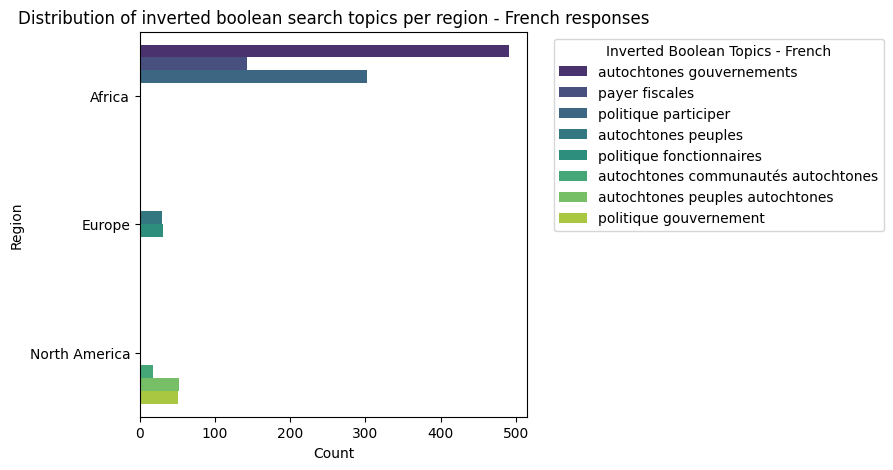

'for region, topics in region_topics.items():\n    print(f"Region: {region}")\n    for i, topic in enumerate(topics):\n        wordcloud = WordCloud(width=800, height=400, background_color=\'white\').generate(topic)\n        plt.figure(figsize=(10, 5))\n        plt.imshow(wordcloud, interpolation=\'bilinear\')\n        plt.axis(\'off\')\n        plt.title(f"Topic {i+1} in {region}")\n        plt.show()'

In [ ]:
# voir plus haut
manual_french_stop_words = [
    'le', 'la', 'les', 'un', 'une', 'des', 'ce', 'cet', 'cette',
    'ces', 'mon', 'ton', 'son', 'ma', 'ta', 'sa', 'notre', 'votre',
    'leur', 'nos', 'vos', 'leurs', 'du', 'de', 'au', 'aux', 'je',
    'tu', 'il', 'elle', 'nous', 'vous', 'ils', 'elles', 'qui', 'que',
    'quoi', 'dont', 'où', 'si', 'mais', 'ou', 'et', 'donc', 'or', 'ni', 'car', 'pour',
    'dans', 'est', 'alors', 'etc', 're', 'en', 'à', 'etre', 'ãªtre', 'oui', 'alerte', 'lanceurs',
    'cela','malheureusement', 'dansl','àªtre','peuvent','propres','n5','administration','publique'
]
file_path = 'GML_Lab_FR.csv'
data = pd.read_csv(file_path)
region_topics = {}
def display_topics(model, feature_names, no_top_words):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        topic_keywords = " ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]])
        topics.append(topic_keywords)
    return topics

for region, group in data.groupby('name_fr'):
    vectorizer = TfidfVectorizer(max_df=0.95, min_df=10, max_features=1000, stop_words=manual_french_stop_words, ngram_range=(1, 3))
    dtm = vectorizer.fit_transform(group['reponse'])
    lda = LatentDirichletAllocation(n_components=3, max_iter=5, learning_method='online', learning_offset=50., random_state=42)
    lda.fit(dtm)
    tf_feature_names = vectorizer.get_feature_names_out()
    topics = display_topics(lda, tf_feature_names, 2)
    region_topics[region] = topics
    document_topics = lda.transform(dtm)
    dominant_topics = np.argmax(document_topics, axis=1)
    document_topics_labels = [topics[i] for i in dominant_topics]
    data.loc[group.index, 'topics'] = document_topics_labels

# Bar Plot for Topic Distribution by Region
topic_counts = data.groupby(['name_fr', 'topics']).size().reset_index(name='counts')
plt.figure(figsize=(5, 5))
sns.barplot(x='counts', y='name_fr', hue='topics', data=topic_counts, palette='viridis')
plt.title('Distribution of inverted boolean search topics per region - French responses')
plt.xlabel('Count')
plt.ylabel('Region')
plt.legend(title='Inverted Boolean Topics - French', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Word Cloud for each topic in each region - à vérifier avec JFS si utile
"""for region, topics in region_topics.items():
    print(f"Region: {region}")
    for i, topic in enumerate(topics):
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(topic)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f"Topic {i+1} in {region}")
        plt.show()"""